# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Observations
#Observation 1: There is a moderately strong relationship between max temperature and latitude in both the northern and southern hemisphere
#Observation 2: The relationship between temperature and latitude is negatively correlated in the N.H. but positively correlated in the S.H.
#Observation 3: There is no significant correlation between latitude and any of the other variables (cloudiness, humidity, etc)

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(27)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city = 'paris'

response = requests.get(query_url + city).json()

pprint(response)


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 48.85, 'lon': 2.35},
 'dt': 1593546980,
 'id': 2988507,
 'main': {'feels_like': 67.78,
          'humidity': 68,
          'pressure': 1011,
          'temp': 70.05,
          'temp_max': 71.6,
          'temp_min': 68},
 'name': 'Paris',
 'sys': {'country': 'FR',
         'id': 6550,
         'sunrise': 1593489043,
         'sunset': 1593547060,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 9.17}}


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

temp = []
humidity = []
city_name = []
city_number = []

latitude = []
longtitude = []
wind = []
cloud = []
temp_max = []
country = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cityname = response['name']
        citynumber = response['id']
        print(f"{cityname} (city number: {citynumber}) is being processed")
        temp.append(response['main']['temp'])
        city_name.append(response['name'])
        city_number.append(response['id'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        temp_max.append(response['main']['temp_max'])
        longtitude.append(response['coord']['lon'])
        country.append(response['sys']['country'])
    except:
        print(f"{city} not found")
        pass

    
    
    

samusu not found
Grindavik (city number: 3416888) is being processed
turtkul not found
Tasiilaq (city number: 3424607) is being processed
Francistown (city number: 933778) is being processed
Longyearbyen (city number: 2729907) is being processed
Barrow (city number: 5880054) is being processed
Albany (city number: 5106841) is being processed
Severo-Kuril'sk (city number: 2121385) is being processed
Tezu (city number: 1254709) is being processed
Kangaatsiaq (city number: 3422683) is being processed
Yellowknife (city number: 6185377) is being processed
Ellsworth (city number: 4963692) is being processed
khonuu not found
Busselton (city number: 2075265) is being processed
Jamestown (city number: 5122534) is being processed
grand river south east not found
Nikolskoye (city number: 546105) is being processed
Ushuaia (city number: 3833367) is being processed
Mataura (city number: 6201424) is being processed
Rikitea (city number: 4030556) is being processed
Souillac (city number: 933995) is b

Kununurra (city number: 2068110) is being processed
Hengyang (city number: 1808370) is being processed
Kargasok (city number: 1504382) is being processed
Castro (city number: 3466704) is being processed
palabuhanratu not found
Rosarito (city number: 3988392) is being processed
Husavik (city number: 2629833) is being processed
Buala (city number: 2109528) is being processed
Buraidah (city number: 107304) is being processed
Lebu (city number: 3883457) is being processed
gurgan not found
Collie (city number: 2074113) is being processed
Kaduqli (city number: 373141) is being processed
Huarmey (city number: 3939168) is being processed
Dosso (city number: 2445488) is being processed
Alexandria (city number: 361058) is being processed
Hambantota (city number: 1244926) is being processed
Kadirli (city number: 310892) is being processed
Cherskiy (city number: 2126199) is being processed
Biržai (city number: 600438) is being processed
Port Elizabeth (city number: 964420) is being processed
Duned

Saldanha (city number: 3361934) is being processed
Bam (city number: 141736) is being processed
Mnogovershinnyy (city number: 2019935) is being processed
Necochea (city number: 3430443) is being processed
Mitzic (city number: 2398283) is being processed
Khasan (city number: 2039557) is being processed
Zandvoort (city number: 2744042) is being processed
Puerto Escondido (city number: 3520994) is being processed
Mana (city number: 3381041) is being processed
Okha (city number: 2122614) is being processed
Khovd (city number: 1516048) is being processed
Sioux Lookout (city number: 6148373) is being processed
Macas (city number: 3654541) is being processed
Padang (city number: 1633419) is being processed
Saint-Pierre (city number: 935214) is being processed
Cabo San Lucas (city number: 3985710) is being processed
Kahului (city number: 5847411) is being processed
Ecoporanga (city number: 3464364) is being processed
Poum (city number: 2138555) is being processed
Suslonger (city number: 485964

Dingzhou (city number: 1812728) is being processed
Yomou (city number: 2414079) is being processed
Garoowe (city number: 58933) is being processed
Hofn (city number: 2630299) is being processed
Cocobeach (city number: 2401357) is being processed
Mahibadhoo (city number: 1337605) is being processed
Dodoma (city number: 160196) is being processed
Kavaratti (city number: 1267390) is being processed
Tanout (city number: 2439155) is being processed
burica not found
Nueve de Julio (city number: 3842881) is being processed
North Platte (city number: 5697939) is being processed
Fort Nelson (city number: 5955902) is being processed
Smoky Lake (city number: 6150293) is being processed
Uglovoye (city number: 690820) is being processed
Oddur (city number: 49747) is being processed
Abalak (city number: 1512223) is being processed
Tazovsky (city number: 1489853) is being processed
Rangāpāra (city number: 1258501) is being processed
Moba (city number: 7341918) is being processed
Juba (city number: 37

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City" : city_name,
    "Country" : country,
    "City Number" : city_number,
    "Temperature" : temp,
    "Humidity" : humidity,
    "Latitude" : latitude,
    "Longtitude" : longtitude,
    "Clouds" : cloud,
    "Wind Speed" : wind,
    "Max Temperature" : temp_max
}

weather_data = pd.DataFrame(weather_dict)

#print
weather_data.head()

,City,Country,City Number,Temperature,Humidity,Latitude,Longtitude,Clouds,Wind Speed,Max Temperature
0,Grindavik,IS,3416888,48.2,93,63.84,-22.43,90,9.17,48.2
1,Tasiilaq,GL,3424607,44.6,83,65.61,-37.64,75,27.51,44.6
2,Francistown,BW,933778,60.8,51,-21.17,27.51,0,9.17,60.8
3,Longyearbyen,SJ,2729907,44.6,56,78.22,15.64,75,5.82,44.6
4,Barrow,US,5880054,39.2,86,71.29,-156.79,90,3.36,39.2


In [7]:
#export into a csv
weather_data.to_csv(r'Weather_Data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_data["Humidity"].max()

100

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

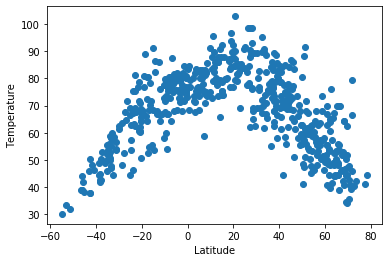

In [12]:
x = weather_data["Latitude"]
y = weather_data["Temperature"]

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature")


plt.savefig('Graph1.png')

## Latitude vs. Humidity Plot

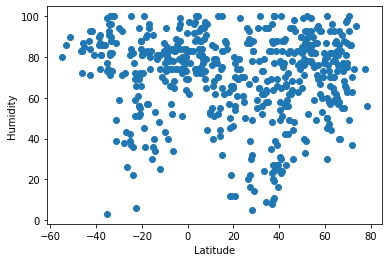

In [13]:
x = weather_data["Latitude"]
y = weather_data["Humidity"]

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig('Graph2.png')

## Latitude vs. Cloudiness Plot

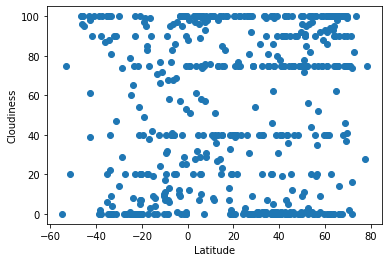

In [14]:
x = weather_data["Latitude"]
y = weather_data["Clouds"]

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig('Graph3.png')

## Latitude vs. Wind Speed Plot

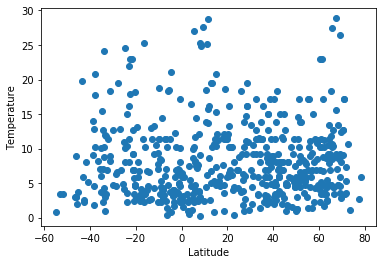

In [15]:
x = weather_data["Latitude"]
y = weather_data["Wind Speed"]

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig('Graph4.png')

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = weather_data.loc[weather_data["Latitude"] > 0]
southern_hem = weather_data.loc[weather_data["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5273813644134697


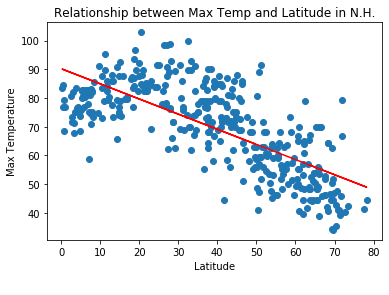

In [18]:
x_values = northern_hem["Latitude"]
y_values = northern_hem["Max Temperature"]



#Run function to create linear regression, plot, and annotate
regression(x_values,y_values)


plt.title("Relationship between Max Temp and Latitude in N.H.")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.savefig('Graph5.png')



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7007046175005537


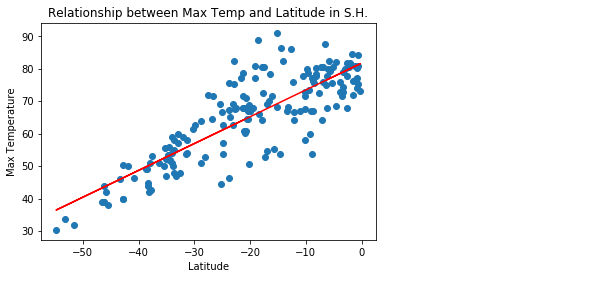

In [19]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Max Temperature"]



#Run function to create linear regression, plot, and annotate
regression(x_values,y_values)

plt.title("Relationship between Max Temp and Latitude in S.H.")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.savefig('Graph6.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001157590508757528


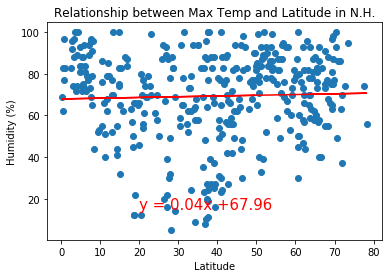

In [20]:
x_values = northern_hem["Latitude"]
y_values = northern_hem["Humidity"]



#Run function to create linear regression, plot, and annotate
regression(x_values,y_values)

plt.title("Relationship between Max Temp and Latitude in N.H.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('Graph7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010566206992220833


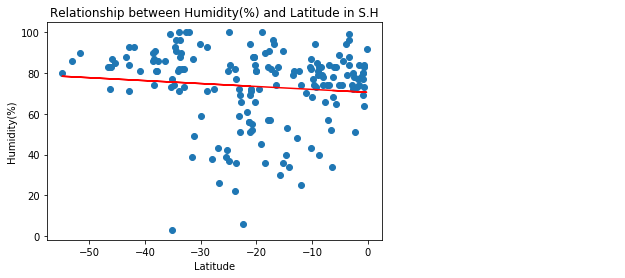

In [21]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Humidity"]



#Run function to create linear regression, plot, and annotate
regression(x_values,y_values)

plt.title("Relationship between Humidity(%) and Latitude in S.H")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig('Graph8.png')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0027997447040770036


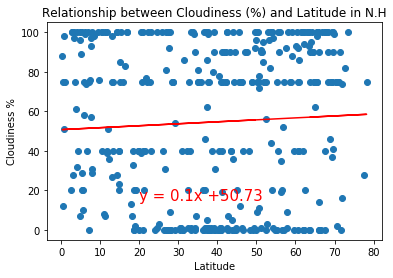

In [22]:
x_values = northern_hem["Latitude"]
y_values = northern_hem["Clouds"]



#Run function to create linear regression, plot, and annotate
regression(x_values,y_values)

plt.title("Relationship between Cloudiness (%) and Latitude in N.H")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.savefig('Graph9.png')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009384856862066141


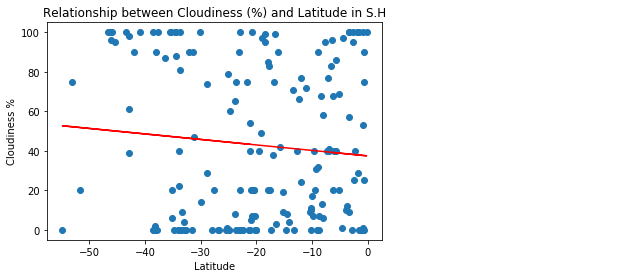

In [23]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Clouds"]



#Run function to create linear regression, plot, and annotate
regression(x_values,y_values)

plt.title("Relationship between Cloudiness (%) and Latitude in S.H")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.savefig('Graph10.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00022640438406592046


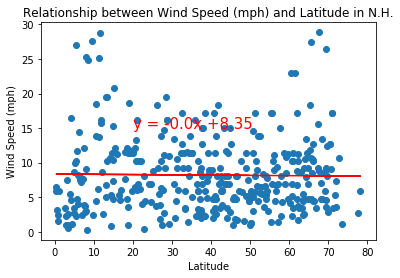

In [24]:
x_values = northern_hem["Latitude"]
y_values = northern_hem["Wind Speed"]



#Run function to create linear regression, plot, and annotate
regression(x_values,y_values)

plt.title("Relationship between Wind Speed (mph) and Latitude in N.H.")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('Graph11.png')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004257732668482056


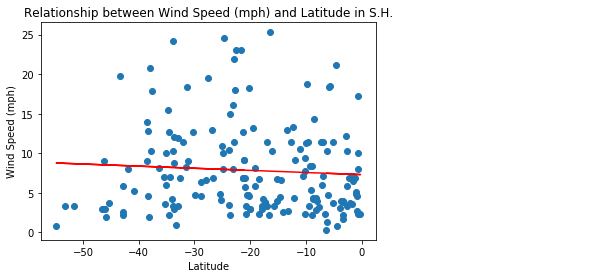

In [25]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Wind Speed"]



#Run function to create linear regression, plot, and annotate
regression(x_values,y_values)

plt.title("Relationship between Wind Speed (mph) and Latitude in S.H.")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('Graph12.png')
